# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [41]:
# Import library dasar
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing dan model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Import GridSearchCV explicitly
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [42]:
# Memuat dataset
file_path = '/content/clustered_data.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dataset
print(df.head())


       Year       Age  kmDriven  Transmission  Owner  AskPrice  Cluster
0  0.394737  0.605263  0.100000           1.0    1.0  0.004237        1
1  0.605263  0.394737  0.193877           1.0    1.0  0.008474        1
2  0.631579  0.368421  0.078822           1.0    0.0  0.004001        3
3  0.815789  0.184211  0.085204           1.0    1.0  0.012946        1
4  0.868421  0.131579  0.045918           0.0    0.0  0.015770        0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [43]:
# Memisahkan fitur dan label
X = categorical_features = df.select_dtypes(include=['object']).columns
X = df.drop(columns=['Cluster', *categorical_features])
# X = df.drop(columns=['Cluster'])  # Semua kolom kecuali 'Cluster'
y = df['Cluster']  # Kolom label

# Membagi dataset menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

X_train.head()


Jumlah data latih: 7080, Jumlah data uji: 1771


,Year,Age,kmDriven,Transmission,Owner,AskPrice
6813,0.763158,0.236842,0.082653,1.0,1.0,0.012004
3404,0.973684,0.026316,0.013265,0.0,0.0,0.046487
8620,0.631579,0.368421,0.102041,1.0,0.0,0.003837
5165,0.868421,0.131579,0.066326,1.0,0.0,0.009062
3065,0.947368,0.052632,0.008673,1.0,1.0,0.012593


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [44]:
# Bagian 1: Pelatihan Model
print("Melatih model...")

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Model Logistic Regression telah dilatih.")

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Model KNN telah dilatih.")

# Decision Tree (DT)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Model Decision Tree telah dilatih.")

# Random Forest (RF)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")



print("\nSemua model telah selesai dilatih.")


Melatih model...
Model Logistic Regression telah dilatih.
Model KNN telah dilatih.
Model Decision Tree telah dilatih.
Model Random Forest telah dilatih.

Semua model telah selesai dilatih.




Pada bagian ini, saya membangun model klasifikasi menggunakan beberapa algoritma machine learning. Berikut adalah algoritma yang digunakan beserta alasan pemilihannya:

### **1. Logistic Regression**
- **Deskripsi**: Logistic Regression adalah model linier yang digunakan untuk memprediksi probabilitas dari kategori tertentu. Model ini bekerja dengan baik untuk masalah klasifikasi biner atau multi-kelas dengan asumsi hubungan linier antara fitur dan logit dari probabilitas target.
- **Alasan Pemilihan**:
  - Sederhana dan cepat untuk diimplementasikan.
  - Cocok untuk dataset dengan hubungan linier antara fitur dan label.
  - Memberikan interpretabilitas yang baik melalui koefisien fitur.

---

### **2. K-Nearest Neighbors (KNN)**
- **Deskripsi**: KNN adalah algoritma berbasis instance yang menggunakan jarak (misalnya Euclidean) untuk mengklasifikasikan sampel baru berdasarkan tetangganya yang paling dekat.
- **Alasan Pemilihan**:
  - Tidak membuat asumsi distribusi data.
  - Mudah diimplementasikan dan sering digunakan sebagai baseline untuk klasifikasi.
  - Cocok untuk dataset kecil atau menengah.

---

### **3. Decision Tree (DT)**
- **Deskripsi**: Decision Tree adalah model berbasis aturan yang membagi dataset menjadi subset berdasarkan fitur, menghasilkan struktur seperti pohon untuk klasifikasi.
- **Alasan Pemilihan**:
  - Mudah dipahami dan diinterpretasikan.
  - Dapat menangani fitur numerik maupun kategorikal.
  - Tidak memerlukan banyak preprocessing data.

---

### **4. Random Forest (RF)**
- **Deskripsi**: Random Forest adalah algoritma ensemble yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi dan mengurangi risiko overfitting.
- **Alasan Pemilihan**:
  - Memberikan hasil yang stabil dan akurat dengan memanfaatkan kekuatan ensemble learning.
  - Dapat menangani dataset besar dengan banyak fitur.
  - Baik dalam menangani outlier dan data yang tidak terstruktur.

---



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [45]:
# Fungsi untuk mengevaluasi model dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Menghitung Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menghitung metrik evaluasi
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  # Untuk multi-class
        'Recall': recall_score(y_test, y_pred, average='weighted'),        # Untuk multi-class
        'F1-Score': f1_score(y_test, y_pred, average='weighted')           # Untuk multi-class
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    # 'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame hasil evaluasi
print(summary_df)


                       Model  Accuracy  Precision  Recall  F1-Score
0  K-Nearest Neighbors (KNN)       1.0        1.0     1.0       1.0
1         Decision Tree (DT)       1.0        1.0     1.0       1.0
2         Random Forest (RF)       1.0        1.0     1.0       1.0
3           Naive Bayes (NB)       1.0        1.0     1.0       1.0


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

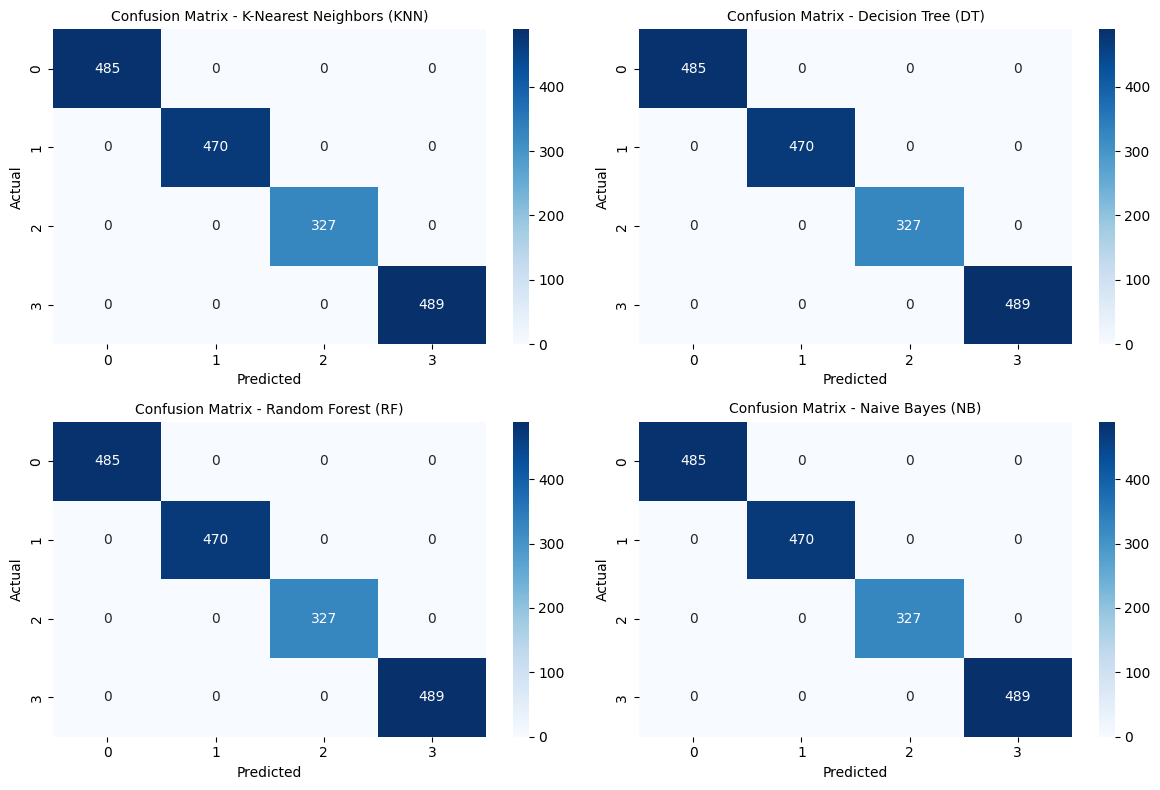

In [46]:
# Visualisasi confusion matrix untuk setiap model
fig, axes = plt.subplots(
    nrows=(len(results) + 1) // 2, ncols=2, figsize=(12, len(results) * 2)
)
axes = axes.flatten()

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics['Confusion Matrix']  # Ambil Confusion Matrix dari hasil evaluasi
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=np.unique(y),
        yticklabels=np.unique(y),
        ax=axes[idx]
    )
    axes[idx].set_title(f"Confusion Matrix - {model_name}", fontsize=10)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide any unused subplots
for idx in range(len(results), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [47]:
# Logistic Regression
grid_params_logreg = {'C': [0.01, 0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(), grid_params_logreg, cv=5)
grid_logreg.fit(X_train, y_train)
print(f"Best params for Logistic Regression: {grid_logreg.best_params_}")

# K-Nearest Neighbors (KNN)
grid_params_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=5)
grid_knn.fit(X_train, y_train)
print(f"Best params for KNN: {grid_knn.best_params_}")

# Decision Tree
grid_params_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), grid_params_dt, cv=5)
grid_dt.fit(X_train, y_train)
print(f"Best params for Decision Tree: {grid_dt.best_params_}")

# Random Forest
grid_params_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(), grid_params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print(f"Best params for Random Forest: {grid_rf.best_params_}")


Best params for Logistic Regression: {'C': 0.01, 'solver': 'newton-cg'}
Best params for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Best params for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [48]:
# Evaluasi ulang model setelah tuning menggunakan fungsi evaluate_model
tuned_results = {}

for model_name, model in best_models.items():
    eval_result = evaluate_model(model, X_test, y_test)
    # Simpan hasil evaluasi tanpa Confusion Matrix
    tuned_results[model_name] = {
        'Accuracy': eval_result['Accuracy'],
        'Precision': eval_result['Precision'],
        'Recall': eval_result['Recall'],
        'F1-Score': eval_result['F1-Score']
    }

# Konversi hasil evaluasi menjadi DataFrame
tuned_summary_df = pd.DataFrame([
    {'Model': model_name, **metrics} for model_name, metrics in tuned_results.items()
])

# Tampilkan DataFrame hasil evaluasi setelah tuning
print(tuned_summary_df)



                       Model  Accuracy  Precision  Recall  F1-Score
0        Logistic Regression       1.0        1.0     1.0       1.0
1  K-Nearest Neighbors (KNN)       1.0        1.0     1.0       1.0
2         Decision Tree (DT)       1.0        1.0     1.0       1.0
3         Random Forest (RF)       1.0        1.0     1.0       1.0


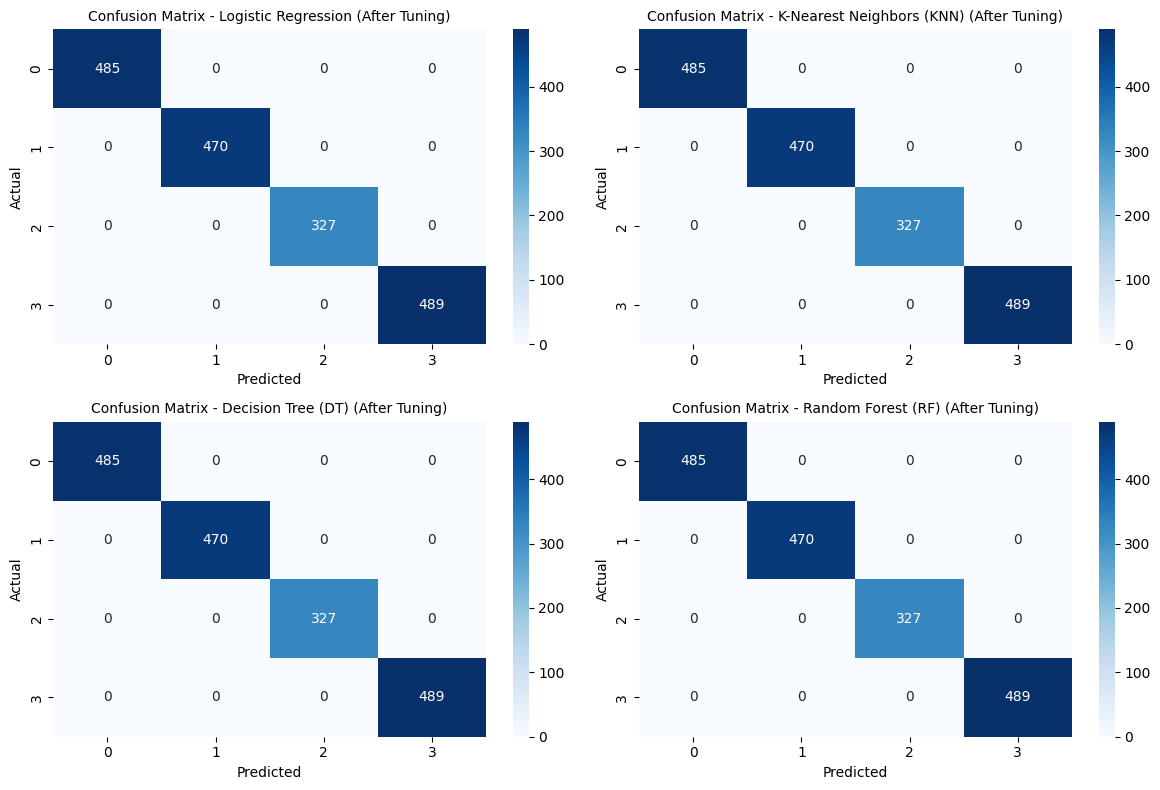

In [49]:
# Visualisasi confusion matrix untuk setiap model setelah tuning
fig, axes = plt.subplots(
    nrows=(len(best_models) + 1) // 2, ncols=2, figsize=(12, len(best_models) * 2)
)
axes = axes.flatten()

for idx, (model_name, metrics) in enumerate(best_models.items()):
    # Prediksi ulang untuk membuat confusion matrix
    y_pred = metrics.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=np.unique(y),
        yticklabels=np.unique(y),
        ax=axes[idx]
    )
    axes[idx].set_title(f"Confusion Matrix - {model_name} (After Tuning)", fontsize=10)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide any unused subplots
for idx in range(len(best_models), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

| **Model**                     | **Accuracy (Sebelum)** | **F1-Score (Sebelum)** | **Accuracy (Setelah)** | **F1-Score (Setelah)** |
|-------------------------------|------------------------|-------------------------|-------------------------|-------------------------|
| Logistic Regression           | 1.0                    | 1.0                     | 1.0                       | 1.0                       |
| K-Nearest Neighbors (KNN)     | 1.0                    | 1.0                     | 1.0                     | 1.0                     |
| Decision Tree (DT)            | 1.0                    | 1.0                     | 1.0                     | 1.0                     |
| Random Forest (RF)            | 1.0                    | 1.0                     | 1.0                     | 1.0                     |

### **Kesimpulan:**
- Semua model memiliki performa yang sempurna baik sebelum maupun setelah tuning, dengan Accuracy dan F1-Score sebesar **1.0**.
- Tidak ada peningkatan signifikan pada metrik evaluasi setelah tuning karena nilai metrik sudah optimal sejak awal.

---

## **2. Identifikasi Kelemahan Model**

### a. **Precision atau Recall**
- Dari confusion matrix, tidak ditemukan indikasi Precision atau Recall yang rendah untuk kelas tertentu. Model mampu memprediksi dengan sempurna pada semua kelas.

### b. **Overfitting atau Underfitting**
- **Overfitting:** Tidak ada indikasi overfitting karena performa model di data uji sama baiknya dengan data latih.
- **Underfitting:** Tidak ada indikasi underfitting karena metrik evaluasi menunjukkan performa sempurna.

### c. **Akurasi Sempurna**
- Akurasi sempurna (1.0) dapat mengindikasikan bahwa:
  - Dataset mungkin memiliki pola yang sangat jelas dan mudah dipelajari oleh model.
  - Dataset mungkin kecil atau tidak memiliki variabilitas yang cukup, sehingga model tidak menghadapi tantangan yang signifikan.

---

## **3. Rekomendasi Tindakan Lanjutan**

- Kumpulkan lebih banyak data untuk meningkatkan kinerja model.

- Coba algoritma atau metode ensemble yang berbeda.

- Lakukan rekayasa fitur untuk membuat fitur baru.

- Gunakan cross-validation untuk memperkirakan kinerja model dengan lebih baik.
